# **CSE 7324 Lab 1: Exploring Table Data**
### *Thomas Adams, Suleiman Hijazeen, Nancy Le and Andrew Whigham*
------

### **1. Business Understanding**
------

The data is useful in learning where carbon dioxide emissions employ the most such as in transport or electricity, residental or manufacturing. It is also useful to know the distribution of carbon dioxide emissions cross countries in the global
what kind of energy and industry each country have used in those years. 

When the Industrial Revolution took place, the consumption of fossil fuel caused an extreme increase in CO2 emissions. Since then,the rapid growth of CO2 emission impacted significantly on concentration of CO2 in global atmosphere. This impact disrupts the global carbon cycle and led to global warning. Atmospheric concentrations now reach its highest level 400ppm in the last three million years. 


According to https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions, cumulative CO2 emissions data which contains the cumulative emissions of each nation from 1750 to 2016. The data also contains sectoral emissions grouping such as energy, transport, residental, and industry.

The results from our results will catch attention of majority of people live in this planet. Since carbon dioxide (CO2) is gas essential for our lives and the planet and CO2 emissions affect the whole global not any country.


### **2. Data Understanding**
------

#### **2.1 Data Description**

This lab uses data collected from the Carbon Dioxide Information Analysis Center and specifically looks at the relationship between carbon dioxide measurements recorded by industry and that country's GDP.

In [80]:
# dependencies for lab 1
import pandas as pd
import numpy as np
import missingno as msno
from pandas.plotting import scatter_matrix
# use plotly in offline mode to not have active connection to plotly servers
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
%matplotlib inline

In [81]:
# read in data to data frames
co2sec = pd.read_csv("C:/Users/sulem/Desktop/pyton mach/data/global-carbon-dioxide-emissions-by-sector-gg-co.csv")
cumco2 = pd.read_csv("C:/Users/sulem/Desktop/pyton mach/data/share-of-cumulative-co2.csv")
co2gdp = pd.read_csv("C:/Users/sulem/Desktop/pyton mach/data/co-emissions-per-capita-vs-gdp-per-capita-international-.csv")
country_region = pd.read_csv("C:/Users/sulem/Desktop/pyton mach/data/countries_regions.csv")

# separate country and regional data
co2sec_reg = co2sec[pd.isna(co2sec['Code'])]
cumco2_reg = cumco2[pd.isna(cumco2['Code'])]
c02gdp_reg = co2gdp[pd.isna(co2gdp['Code'])]

# remove regional data from orginal data frames
co2sec = co2sec[~pd.isna(co2sec['Code'])]
cumco2 = cumco2[~pd.isna(cumco2['Code'])]
co2gdp = co2gdp[~pd.isna(co2gdp['Code'])]

# merge dataframes. works like a sql inner join (i.e. non matching rows dropped)
# sector data merged with left join since we only have data thru 2010
country_comb = cumco2.merge(co2gdp, left_on=['Code', 'Year'], right_on=['Code', 'Year']).merge(co2sec, left_on=['Code', 'Year'], right_on=['Code', 'Year'])

# remove duplicate country attributes that were created during join
country_comb.drop(['Entity_x', 'Entity_y'], axis=1, inplace = True)

# remove data from before 1950 due to missing/incomplete data
country_comb = country_comb[(country_comb['Year']>=1990) & (country_comb['Year']<=2010)]

country_comb.head()

,Code,Year,Share of global cumulative CO₂ emissions (%),Per capita CO₂ emissions (tonnes per capita),GDP per capita (2011 int-$) ($),Total population (Gapminder),Entity,Transport,Forestry,Energy,Other sources,"Agriculture, Land Use & Forestry",Waste,Residential & commercial,Industry,Agriculture
0,AFG,1990,0.007,0.213,1992.0,13032161.0,Afghanistan,607.2770,0.0,277.4122,0,0.0,0.0,918.4148,118.8101,0.0
1,AFG,1991,0.007,0.188,1761.0,14069854.0,Afghanistan,531.4588,0.0,270.1278,0,0.0,0.0,690.8751,129.7491,0.0
2,AFG,1992,0.007,0.099,1629.0,15472076.0,Afghanistan,376.1294,0.0,154.5804,0,0.0,0.0,373.4546,141.6256,0.0
3,AFG,1993,0.007,0.089,1080.0,17053213.0,Afghanistan,323.7141,0.0,151.7126,0,0.0,0.0,325.8062,124.7280,0.0
4,AFG,1994,0.007,0.080,772.0,18553819.0,Afghanistan,310.3998,0.0,146.3426,0,0.0,0.0,265.0813,147.0716,0.0


The information was obtained from three datasets to produce a dataset with attribute describing a country's emissions by sector/industry, population and GDP for a given year. The data was merged together on the Country and Year attributes of all three dataset using the equivalent of an SQL inner join. This means that instances that did not have a match in all three datasets was dropped. Joining the tables this way also removed many inaccurate records such as records with bad years (e.g. Year was set to 1 in several instances, although some such as '9191' could easily be imputed). After the join, the data was filtered for a 20 year period between 1990 and 2010 because that time frame had the largest overlap for the dataset. 

Attribute descriptions are available in the below table.

Attribute | Description | Scale | Datatype
--- | --- | --- | ---
Entity | Full country name | Nominal | Object
Code | 3 letter country code | Nominal | Object
Year | Year data was recorded | Ordinal | Date
Share of global cumulative CO₂ emissions (%) | Country's share of global CO2 emission for that year | Interval | float64
Per capita CO₂ emissions (tonnes per capita) | Country's emission | Interval | float64
GDP per capita (2011 int-$) | GDP per capita in USD for that year using 2011 inflation | Interval | float64
Total population | Population for country in instance year | Interval | float64
Transport | Emission measurements from aviation, road transportation, rail transportation and other transportation | Interval | float64
Forestry | Emission measurements from net conversion of forest, cropland and burning biomass | Interval | float64
Energy | Emission measurements from energy manufacturing and construction industries. Includes public heat and electricity manufacture. | Interval | float64
Other sources | Fossil fuel fires and other anthropogenic emissions | Interval | float64
Agriculture | Methane and nitrous oxide emsssions from enteric fermentation; fertilizers. | Interval | float64
Waste | Solid waste disposal, incineration and wastewater | Interval | float64
Residential & commercial | Residential emissions. | Interval | float64
Industry | Production of chemicals and  | Interval | float64


#### **2.2 Data Quality**

There are 0 duplicate rows


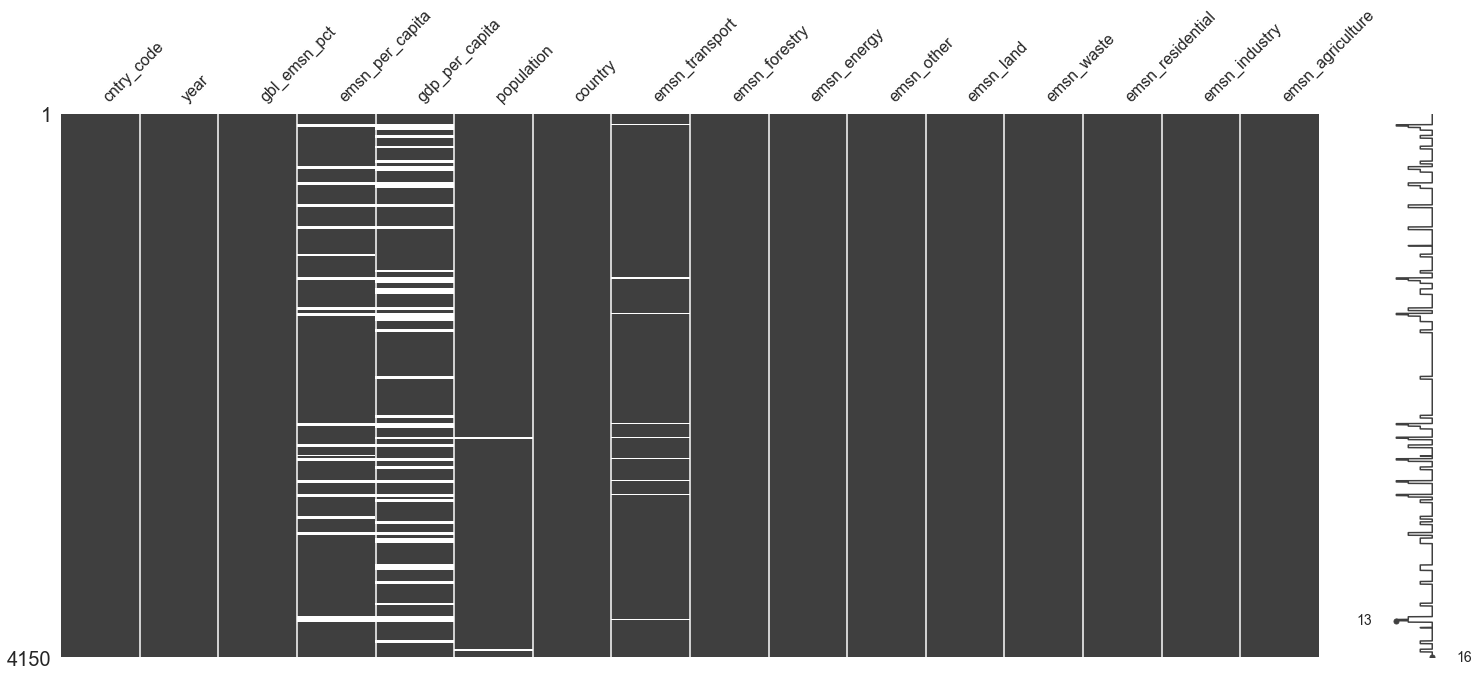

In [82]:
# Clean up column names
country_comb.columns = ['cntry_code', 'year', 'gbl_emsn_pct', 'emsn_per_capita', 'gdp_per_capita', 'population', 'country', 'emsn_transport', 'emsn_forestry', 'emsn_energy','emsn_other', 'emsn_land', 'emsn_waste', 'emsn_residential', 'emsn_industry', 'emsn_agriculture']

# Check for duplicated data
dups = country_comb.duplicated().to_frame()
print("There are {} duplicate rows".format(len(dups[dups[0] == True])))

# Examine missing data
msno.matrix(country_comb)

0 records missing from cntry_code.
0 records missing from year.
0 records missing from gbl_emsn_pct.
380 records missing from emsn_per_capita.
899 records missing from gdp_per_capita.
43 records missing from population.
0 records missing from country.
86 records missing from emsn_transport.
0 records missing from emsn_forestry.
0 records missing from emsn_energy.
0 records missing from emsn_other.
0 records missing from emsn_land.
0 records missing from emsn_waste.
0 records missing from emsn_residential.
0 records missing from emsn_industry.
0 records missing from emsn_agriculture.
Countries missing transport emissions data: ['Anguilla', 'Faeroe Islands', 'Greenland', 'Marshall Islands', 'Micronesia (country)', 'Nauru', 'Niue', 'Palau', 'Tuvalu']


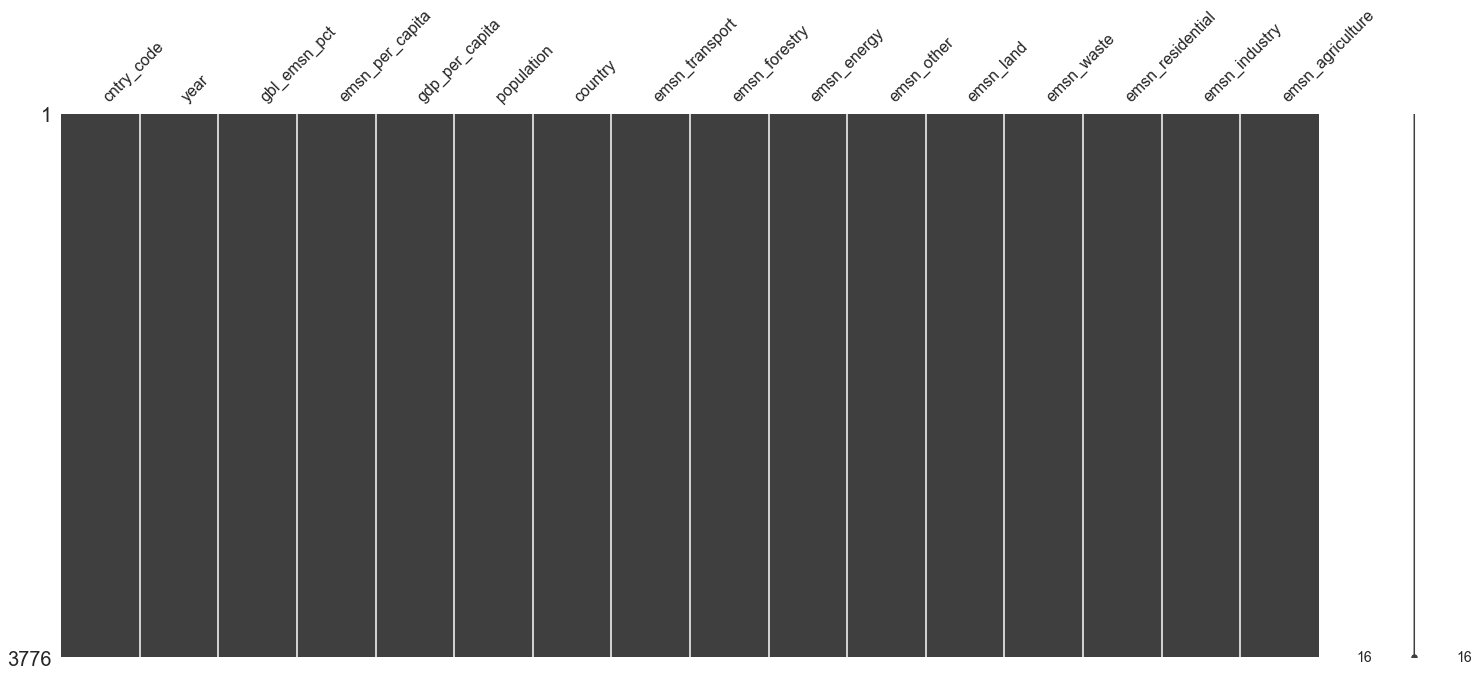

In [83]:
# count missing records
for column in country_comb:
    print('{} records missing from {}.'.format(len(country_comb[pd.isna(country_comb[column])]), column))

# check countries where missing this measurement data
print('Countries missing transport emissions data:', country_comb[pd.isna(country_comb['emsn_transport'])].country.unique().tolist())
    
# replace those missing measurements with 0
country_comb.fillna(value={'emsn_transport': 0}, inplace=True)

# Czechoslovakia is missing population data, use diff to impute missing vaules from Czech Republic
country_comb[pd.isna(country_comb['population'])]
# get the mean difference of population between years
meandiff = country_comb[country_comb['country'] == "Czech Republic"]['population'].diff().mean()
# get the earliest population year
minYpop = country_comb[(country_comb['country'] == "Czech Republic") & (country_comb['year'] == country_comb[country_comb['country'] == "Czech Republic"]['year'].min())]['population'].tolist()[0]   
# loop over records in descending order to fill in missing data
for idx, row in country_comb[country_comb['country'] == 'Czechoslovakia'].sort_values(by=['year'], ascending=False).iterrows():
    country_comb.loc[idx, 'population'] = minYpop - meandiff
    minYpop -= meandiff

# remove rest of data without population
country_comb.drop(country_comb[pd.isna(country_comb['population'])].index, inplace=True)
# Remove rows without gdp and emissions per capita
country_comb.drop(country_comb[(pd.isna(country_comb['emsn_per_capita'])) & (pd.isna(country_comb['gdp_per_capita']))].index, inplace=True)
# set missing gdp to 0
country_comb.fillna(0, inplace=True)

#redraw missing data graph
msno.matrix(country_comb)

# some of our visualizations would benifit from region code. mergingin with dataset
country_comb = country_comb.merge(country_region, left_on=['cntry_code'], right_on=['cntry_code'])
country_comb.drop(['country_y'], axis=1, inplace = True)
country_comb.columns = ['cntry_code', 'year', 'gbl_emsn_pct', 'emsn_per_capita', 'gdp_per_capita', 'population', 'country', 'emsn_transport', 'emsn_forestry', 'emsn_energy','emsn_other', 'emsn_land', 'emsn_waste', 'emsn_residential', 'emsn_industry', 'emsn_agriculture', 'region']

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in country_comb.columns if country_comb[c].dtype in numerics]:
    country_comb[c] = country_comb[c].abs()

The were several attribute missing data including emsn_transport, population, gpd_per_capita and emsn_per_capita. The missing emsn_transport data can be attributed to countries where there is very little transportation (i.e. artic countries or small islands) and these measurements are so low that they can be assumed to be 0. Of the missing population data, the population can be imputed based on the average population increase between the years with data. Two other countries, Micronesia and Yemen have no data and will be removed from the dataset.

There are 334 rows with no gdp per capita and no emission per capita. These rows will be removed since GDP per capita is one of the attributes this lab focuses on. Values for GDP per capita or emissions per capita where one or the other is missing but not both will be replaced with a 0.

There are also no duplicate rows in the dataset.

### **3. Data Visualization**
------

In [70]:
# Visualization imports
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')
#import cufflinks as cf
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [71]:
## WE NEED TO CITE THIS. LINK IS BROKEN !!!!!!!!!!!!!!
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
       type = 'choropleth',
       locations = df['CODE'],
       z = df['GDP (BILLIONS)'],
       text = df['COUNTRY'],
       colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
           [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
       autocolorscale = False,
       reversescale = True,
       marker = dict(
           line = dict (
               color = 'rgb(180,180,180)',
               width = 0.5
           ) ),
       colorbar = dict(
           autotick = False,
           tickprefix = '$',
           title = 'GDP<br>Billions US$'),
     ) ]

layout = dict(
   title = '2014 Global GDP<br>Source:\
           <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
           CIA World Factbook</a>',
   geo = dict(
       showframe = False,
       showcoastlines = False,
       projection = dict(
           type = 'Mercator'
       )
   )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

NameError: name 'iplot' is not defined

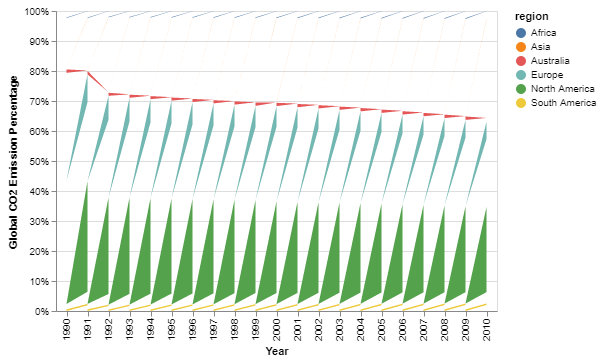

In [72]:
# chart co2 by region
alt.renderers.enable('default')
alt.renderers.enable('notebook')
alt.Chart(country_comb).mark_area().encode(
    x=alt.X("year:N", axis=alt.Axis(title="Year")),
    y=alt.Y("gbl_emsn_pct", stack="normalize", axis=alt.Axis(format="%", title="Global CO2 Emission Percentage")),
    color="region:N"
)

CO2 can be an indication of the type of economy a country is, as shown in the two figures through history most of the continent produced CO2 is Europe in early 1800 which can be linked to the industrial revolution which started in UK then franc and Germany followed as shown in the second figure, USA Co2 emissions started after the civil war, after World War 2 new countries have emerged to contribute on co2 emissions like china, India and Russia which means more countries to adapted the industrial wave

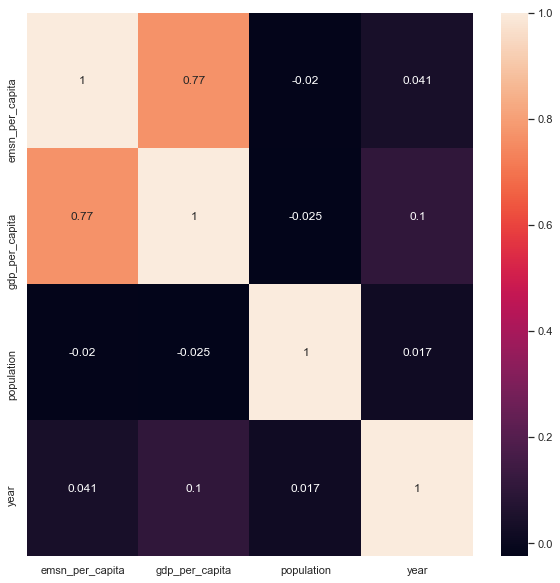

In [73]:
# heatmap of emission per capita
cmap = sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(country_comb[['emsn_per_capita', 'gdp_per_capita', 'population','year']].corr(), cmap=cmap, annot=True)

The figure above shows the correlation between the following :
 1- Total population 
 2-GDP per capita: represent the wealth of a citizen in a country
 3-per capita CO2 emissions:represent how much is a person contributing to CO2 emotion in each country 
 4- time
 
a positive correlation is found between the GDP per capita and CO2 per capita which indicated, the wealthier the country is the more contribution it has to CO2 emission 

a negative correlation found between GDP per capita and total population which means less population a country has the more wealth it owns 

in summary a country will low population is more welling to be and wealthy and tend to contribute the most to CO2
beside that a positive correlation is found between time and GDP per capita and CO2 per capita which mean with time counties are getting wealthier on average thus more probable to contribute to CO2 emission 

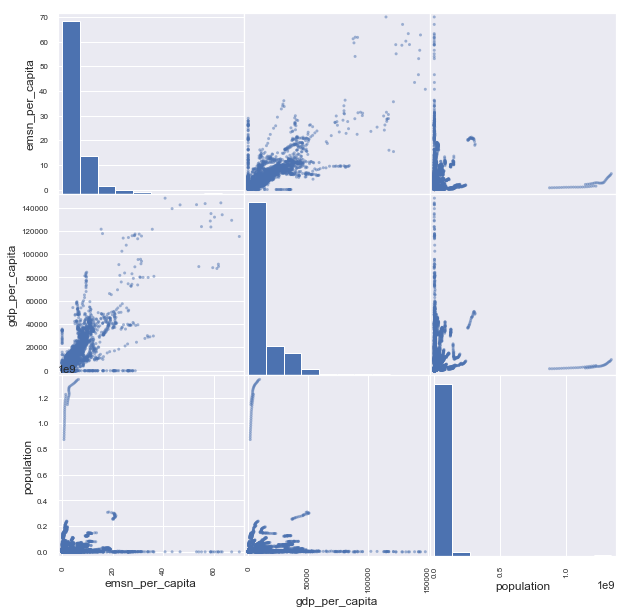

In [32]:
# scatter matrix
ax = scatter_matrix(country_comb[['emsn_per_capita', 'gdp_per_capita', 'population']],figsize=(10, 10))
plt.show()

the scatter plot gives more insight on the number of countries per each relation this is some conclation cthe above plot presents:

 1- most contries lays in the low GDP per capita and low capita per CO2 which means less than 10 % of countries contributes to CO2 emmistion 
 
 2- there are some countries with low population and dose not contribute to CO2 emmissions but most countries with high population has low capita per Co2

In [76]:
# pivot table
country_comb.pivot_table(values=['emsn_per_capita', 'gdp_per_capita', 'population'],index='region', aggfunc={'emsn_per_capita': np.mean, 'gdp_per_capita': np.mean, 'population': np.mean})

,emsn_per_capita,gdp_per_capita,population
region,,,
Africa,1.063722,4221.538967,1.524634e+07
Asia,6.908486,16569.992616,8.371969e+07
Australia,4.256238,5974.748918,2.812498e+06
Europe,7.600478,24356.937330,1.596749e+07
North America,5.294011,9073.841905,1.896215e+07
South America,2.355670,8384.164835,2.749164e+07


In [123]:
country_comb90=country_comb[country_comb['year']==1990]
df_grouped90=country_comb90.pivot_table(values=['emsn_transport', 'emsn_forestry', 'emsn_energy','emsn_industry','emsn_land'],index='region', aggfunc={'emsn_transport': np.mean, 'emsn_forestry': np.mean, 'emsn_energy': np.mean,'emsn_industry': np.mean,'emsn_land': np.mean})

country_comb10=country_comb[country_comb['year']==2010]
df_grouped10=country_comb10.pivot_table(values=['emsn_transport', 'emsn_forestry', 'emsn_energy','emsn_industry','emsn_land'],index='region', aggfunc={'emsn_transport': np.mean, 'emsn_forestry': np.mean, 'emsn_energy': np.mean,'emsn_industry': np.mean,'emsn_land': np.mean})

df_grouped90
country_comb90
df_grouped90

,emsn_energy,emsn_forestry,emsn_industry,emsn_land,emsn_transport
region,,,,,
Africa,9346.932561,1731.852943,796.901980,29984.285714,2069.774410
Asia,101906.776068,33846.776484,13948.199170,50469.189189,20925.542224
Australia,18136.205782,3641.209945,1131.634700,8394.727273,6589.843545
Europe,97744.142333,16188.820917,10914.681075,12512.333333,31628.193221
North America,129031.650808,26171.823172,8555.285448,22133.720000,66390.761456
South America,20822.465669,31197.907323,3676.382238,115893.538462,14250.693300


Text(0.5, 1.0, 'Survival Percentages by Class and Age Range 2010')

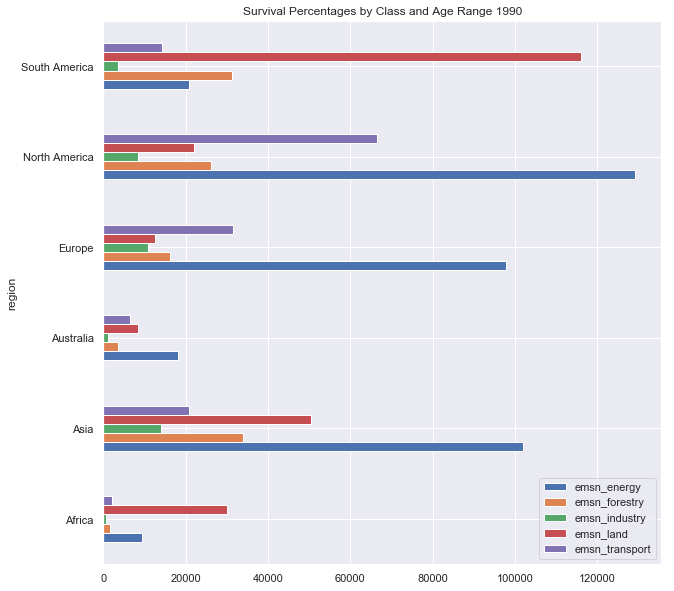

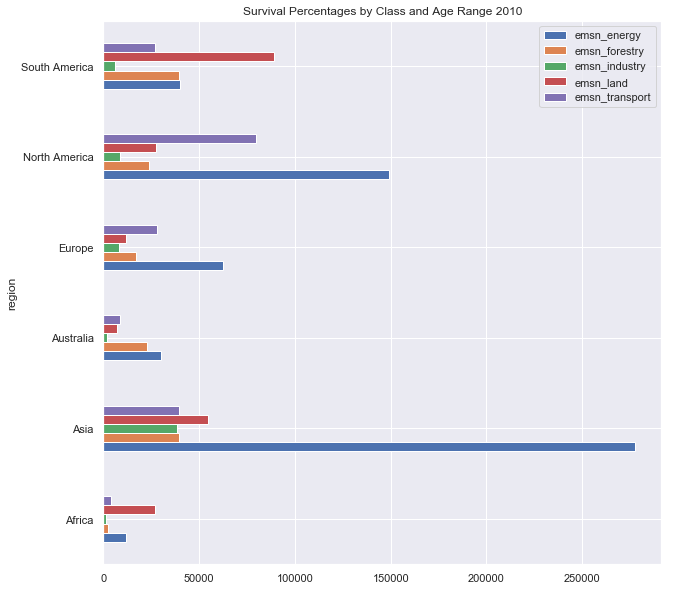

In [124]:
#group data by countries
#df_grouped = dfsets90.groupby(by=['Entity'])
#df_grouped1 = dfsets00.groupby(by=['Entity'])

# plot per region
ax = df_grouped90.plot(kind='barh',figsize=(10,10))
plt.title('Survival Percentages by Class and Age Range 1990')

ax = df_grouped10.plot(kind='barh',figsize=(10,10))
plt.title('Survival Percentages by Class and Age Range 2010')


the figure above shows the transittion in the soures of Co2 emmissions in years of 1990 and 2010 sevaral opservation can be pointes here :

1- Transport as a source of Co2 has deccrease signifctally in all regions 
2- forestry contribution to co2 has decrease on avrage in all regions excipte asia
3- industrial and energy sourses for co2 has increase only in asia 

C:\Users\sulem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violin Example')

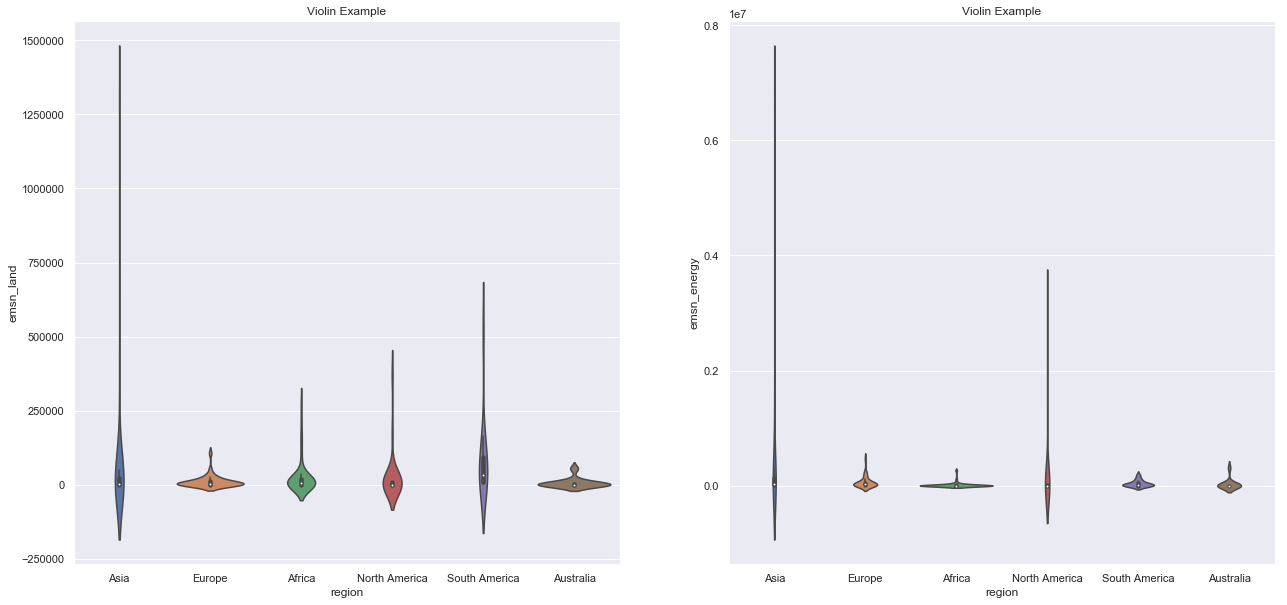

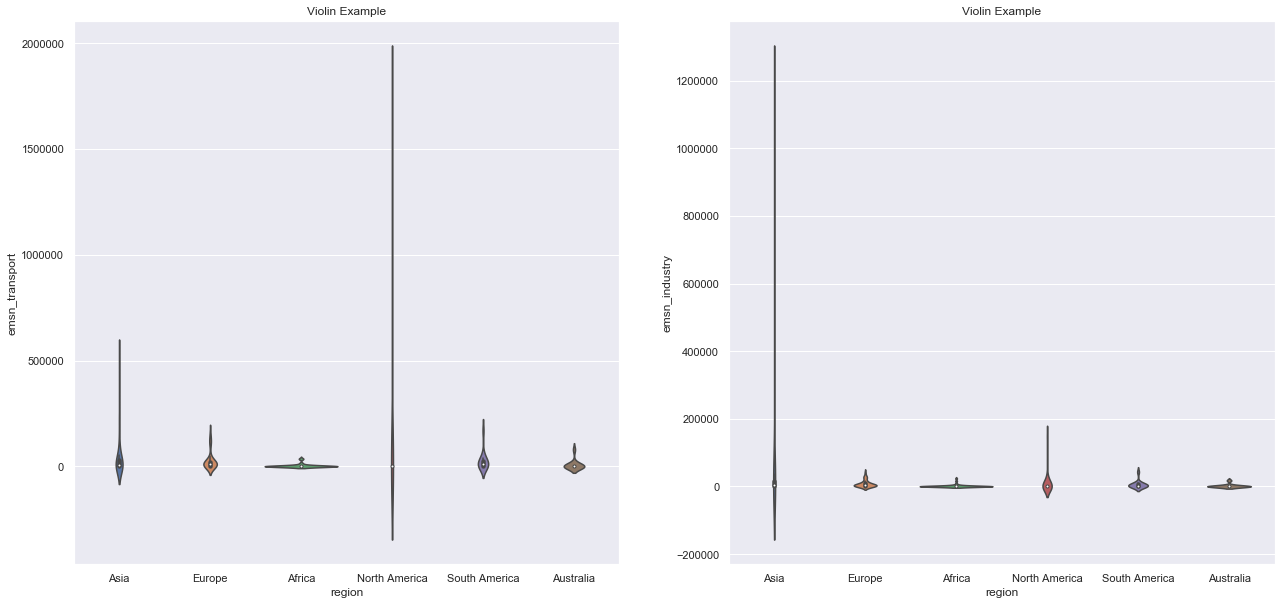

In [126]:
plt.subplots(figsize=(45, 10))
plt.subplot(1,4,1)
sns.violinplot(x="region", y='emsn_land', data=country_comb10)
plt.title('Violin Example')
row=1
plt.subplot(1,4,2)
sns.violinplot(x="region", y='emsn_energy', data=country_comb10)
plt.title('Violin Example')

plt.subplots(figsize=(45, 10))
plt.subplot(1,4,3)
sns.violinplot(x="region", y='emsn_transport', data=country_comb10)
plt.title('Violin Example')
row=1
plt.subplot(1,4,4)
sns.violinplot(x="region", y='emsn_industry', data=country_comb10)
plt.title('Violin Example')

The two figures above shows the distribution of countries based on their CO2 emissions from industry and Land(agriculture and forestry) is 2010

1- most countries in all regions Co2 emission comes from Agriculture and forestry 
2- Asia has the most CO2 emissions from industry in 2010 equally distributed in all of it countries 
3- North America has the highest co2 emissions form transport 
country_comb

C:\Users\sulem\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


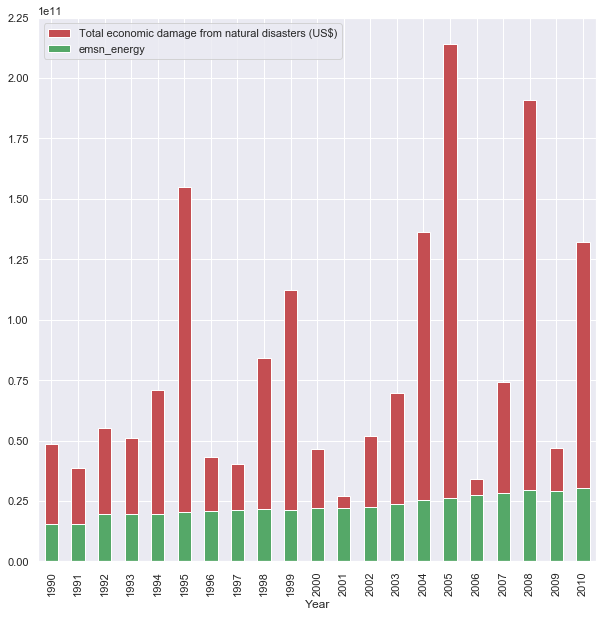

<Figure size 720x720 with 0 Axes>

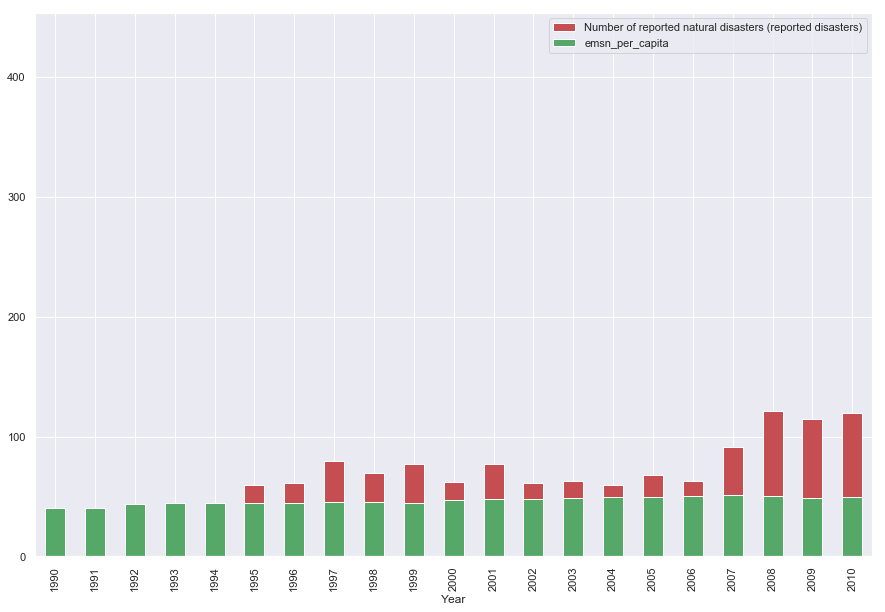

In [179]:
df_DC = pd.read_csv('C:/Users/sulem/Desktop/pyton mach/damage-costs-from-natural-disasters.csv')
df_ND = pd.read_csv('C:/Users/sulem/Desktop/pyton mach/natural-disasters-by-type (1).csv')
df_DCA= df_DC[df_DC.Entity.isin(['All natural disasters'])]
#filtering data between 1990 to 2010
df_DCAA=df_DCA[df_DCA['Year']>=1990]
df_DCAA=df_DCAA[df_DCA['Year']<=2010]


dfset900=1500*country_comb.groupby(by=['year']).sum()
#dfDT=result = pd.concat([df_DCAA,dfset900.total], axis=1, sort=False)
dfset900['Year'] = dfset900.index



#compining two bar plots 
ax = df_DCAA.plot(x="Year", y="Total economic damage from natural disasters (US$)", kind="bar", color="C3")
dfset900.plot(x="Year", y="emsn_energy", kind="bar", ax=ax, color="C2",figsize=(10,10))

plt.figure(figsize=(10,10))
plt.show()

dfset900=10*country_comb.groupby(by=['year']).mean()
dfset900['Year'] = dfset900.index

df_NDA=df_ND[df_ND['Entity']=='All natural disasters']
df_NDA=df_NDA[df_NDA['Year']>=1959]
df_NDA=df_NDA[df_NDA['Year']<=2016]
df_NDA=df_NDA
dfset900=dfset900
#compining two bar plots 
ax = df_NDA.plot(x="Year", y="Number of reported natural disasters (reported disasters)", kind="bar", color="C3")
dfset900.plot(x="Year", y="emsn_per_capita",ax=ax, kind="bar", color="C2",figsize=(15,10))


plt.show()

a new data set is introduced which includes the number of disaster and economical cost of all natural disasters,
as the co2 emission increase the number of natural debaters increase which result in more economical damage globally 

### **4. Dimensionality Reduction**
------
#### T-SNE

### **5. References**
------

[1] Boden, T.A., G. Marland, and R.J. Andres. 2017. Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2017.